In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
from datetime import datetime

from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8


In [3]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8&q=Boston


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [8]:
city_weather.status_code

200

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":69.21,"feels_like":70.63,"temp_min":66,"temp_max":73,"pressure":1027,"humidity":63},"wind":{"speed":0.83,"deg":100},"clouds":{"all":0},"dt":1592400890,"sys":{"type":1,"id":4967,"country":"US","sunrise":1592384819,"sunset":1592439816},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 69.21,
  'feels_like': 70.63,
  'temp_min': 66,
  'temp_max': 73,
  'pressure': 1027,
  'humidity': 63},
 'wind': {'speed': 0.83, 'deg': 100},
 'clouds': {'all': 0},
 'dt': 1592400890,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1592384819,
  'sunset': 1592439816},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8&q=Boston


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 69.21,
  'feels_like': 70.63,
  'temp_min': 66,
  'temp_max': 73,
  'pressure': 1027,
  'humidity': 63},
 'wind': {'speed': 0.83, 'deg': 100},
 'clouds': {'all': 0},
 'dt': 1592400890,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1592384819,
  'sunset': 1592439816},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["sys"]

{'type': 1,
 'id': 4967,
 'country': 'US',
 'sunrise': 1592384819,
 'sunset': 1592439816}

In [17]:
boston_data["sys"]["country"]

'US'

In [18]:
boston_data["dt"]

1592400890

In [19]:
boston_data["coord"]["lat"]

42.36

In [20]:
boston_data["main"]["temp_max"]

73

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 73 63 0 0.83


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 17, 13, 34, 50)

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longfeng
Processing Record 2 of Set 1 | paka
Processing Record 3 of Set 1 | andevoranto
City not found. Skipping...
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | balkhash
Processing Record 8 of Set 1 | kalmunai
Processing Record 9 of Set 1 | cikarang
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | isla aguada
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | piacabucu
Processing Record 14 of Set 1 | hay river
Processing Record 15 of Set 1 | abu kamal
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | clearwater
Processing Record 19 of Set 1 | barcelos
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 1 

Processing Record 38 of Set 4 | korla
Processing Record 39 of Set 4 | pisco
Processing Record 40 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 4 | lunenburg
Processing Record 42 of Set 4 | vardo
Processing Record 43 of Set 4 | gizo
Processing Record 44 of Set 4 | burica
City not found. Skipping...
Processing Record 45 of Set 4 | hilo
Processing Record 46 of Set 4 | baie-comeau
Processing Record 47 of Set 4 | vestmannaeyjar
Processing Record 48 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 4 | kaitangata
Processing Record 50 of Set 4 | san jose
Processing Record 1 of Set 5 | basco
Processing Record 2 of Set 5 | esperance
Processing Record 3 of Set 5 | cabedelo
Processing Record 4 of Set 5 | ust-kuyga
Processing Record 5 of Set 5 | stornoway
Processing Record 6 of Set 5 | mar del plata
Processing Record 7 of Set 5 | marcona
City not found. Skipping...
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 

Processing Record 27 of Set 8 | nyagan
Processing Record 28 of Set 8 | cherskiy
Processing Record 29 of Set 8 | caravelas
Processing Record 30 of Set 8 | debre tabor
Processing Record 31 of Set 8 | zaysan
Processing Record 32 of Set 8 | severnyy
Processing Record 33 of Set 8 | faya
Processing Record 34 of Set 8 | karamea
City not found. Skipping...
Processing Record 35 of Set 8 | marana
Processing Record 36 of Set 8 | revda
Processing Record 37 of Set 8 | samarai
Processing Record 38 of Set 8 | hualmay
Processing Record 39 of Set 8 | koroni
Processing Record 40 of Set 8 | zhanaozen
Processing Record 41 of Set 8 | rocha
Processing Record 42 of Set 8 | kabompo
Processing Record 43 of Set 8 | toulepleu
City not found. Skipping...
Processing Record 44 of Set 8 | sioux lookout
Processing Record 45 of Set 8 | zyryanka
Processing Record 46 of Set 8 | hailin
Processing Record 47 of Set 8 | vila franca do campo
Processing Record 48 of Set 8 | mount isa
Processing Record 49 of Set 8 | peleduy
Pr

Processing Record 16 of Set 12 | karaul
City not found. Skipping...
Processing Record 17 of Set 12 | krasnoselkup
Processing Record 18 of Set 12 | havre-saint-pierre
Processing Record 19 of Set 12 | griffith
Processing Record 20 of Set 12 | pittsfield
Processing Record 21 of Set 12 | dhidhdhoo
Processing Record 22 of Set 12 | ortakoy
Processing Record 23 of Set 12 | ituni
City not found. Skipping...
Processing Record 24 of Set 12 | veraval
Processing Record 25 of Set 12 | manzhouli
Processing Record 26 of Set 12 | gopalpur
Processing Record 27 of Set 12 | reefton
City not found. Skipping...
Processing Record 28 of Set 12 | baykit
Processing Record 29 of Set 12 | gaoual
Processing Record 30 of Set 12 | jaciara
Processing Record 31 of Set 12 | san francisco
Processing Record 32 of Set 12 | sironj
Processing Record 33 of Set 12 | benguela
Processing Record 34 of Set 12 | murray bridge
Processing Record 35 of Set 12 | tinaquillo
Processing Record 36 of Set 12 | cap-aux-meules
Processing Re

In [25]:
len(city_data)

546

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longfeng,46.55,125.12,62.65,68,2,8.70,CN,2020-06-17 13:38:36
1,Paka,4.64,103.44,78.80,94,89,3.36,MY,2020-06-17 13:38:37
2,Avarua,-21.21,-159.78,71.60,64,44,6.93,CK,2020-06-17 13:38:37
3,Albany,42.60,-73.97,69.01,59,0,2.06,US,2020-06-17 13:35:02
4,Ushuaia,-54.80,-68.30,39.20,88,40,17.22,AR,2020-06-17 13:38:37
5,Balkhash,46.84,74.98,65.93,62,61,21.88,KZ,2020-06-17 13:36:21
6,Kalmunai,7.42,81.82,86.79,69,66,5.79,LK,2020-06-17 13:38:38
7,Cikarang,-6.26,107.15,86.00,66,40,11.41,ID,2020-06-17 13:38:38
8,Guerrero Negro,27.98,-114.06,63.34,83,84,11.77,MX,2020-06-17 13:35:25
9,Isla Aguada,18.78,-91.47,80.60,83,75,6.93,MX,2020-06-17 13:38:38


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longfeng,CN,2020-06-17 13:38:36,46.55,125.12,62.65,68,2,8.70
1,Paka,MY,2020-06-17 13:38:37,4.64,103.44,78.80,94,89,3.36
2,Avarua,CK,2020-06-17 13:38:37,-21.21,-159.78,71.60,64,44,6.93
3,Albany,US,2020-06-17 13:35:02,42.60,-73.97,69.01,59,0,2.06
4,Ushuaia,AR,2020-06-17 13:38:37,-54.80,-68.30,39.20,88,40,17.22
5,Balkhash,KZ,2020-06-17 13:36:21,46.84,74.98,65.93,62,61,21.88
6,Kalmunai,LK,2020-06-17 13:38:38,7.42,81.82,86.79,69,66,5.79
7,Cikarang,ID,2020-06-17 13:38:38,-6.26,107.15,86.00,66,40,11.41
8,Guerrero Negro,MX,2020-06-17 13:35:25,27.98,-114.06,63.34,83,84,11.77
9,Isla Aguada,MX,2020-06-17 13:38:38,18.78,-91.47,80.60,83,75,6.93


In [28]:
new_city_data_df.count()

City          546
Country       546
Date          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
dtype: int64

In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
new_city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = new_city_data_df["Lat"]
max_temps = new_city_data_df["Max Temp"]
humidity = new_city_data_df["Humidity"]
cloudiness = new_city_data_df["Cloudiness"]
wind_speed = new_city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time

In [32]:
# # Get today's date in seconds.
# today = time.time()
# today

In [33]:
# today = time.strftime("%x")
# today

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

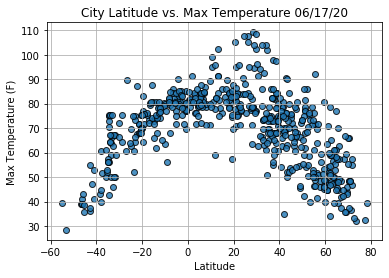

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

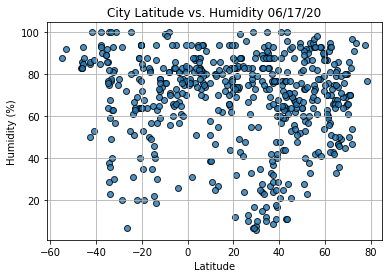

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

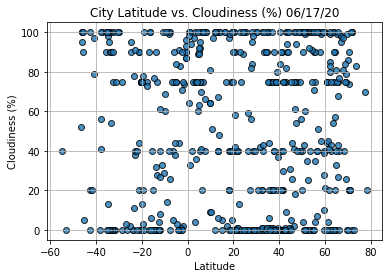

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

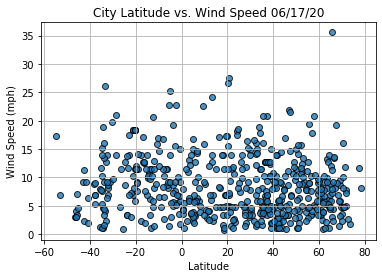

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [42]:
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longfeng,46.55,125.12,62.65,68,2,8.70,CN,2020-06-17 13:38:36
1,Paka,4.64,103.44,78.80,94,89,3.36,MY,2020-06-17 13:38:37
3,Albany,42.60,-73.97,69.01,59,0,2.06,US,2020-06-17 13:35:02
5,Balkhash,46.84,74.98,65.93,62,61,21.88,KZ,2020-06-17 13:36:21
6,Kalmunai,7.42,81.82,86.79,69,66,5.79,LK,2020-06-17 13:38:38
...,...,...,...,...,...,...,...,...,...
541,Ossora,59.24,163.07,51.13,90,100,4.36,RU,2020-06-17 13:40:25
542,Batesville,35.77,-91.64,73.99,69,0,3.71,US,2020-06-17 13:40:26
543,Tambura,5.60,27.47,79.30,78,95,5.66,SS,2020-06-17 13:40:26
544,Male,4.17,73.51,86.00,74,75,13.87,MV,2020-06-17 13:36:28


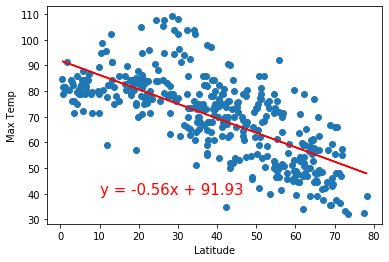

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

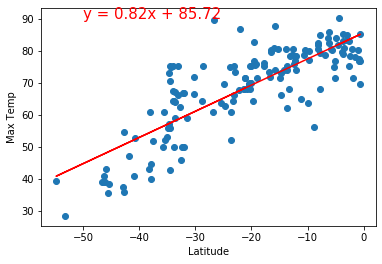

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp",(-50,90))

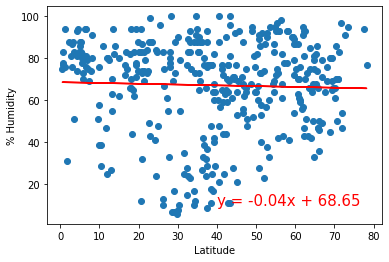

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (40, 10))

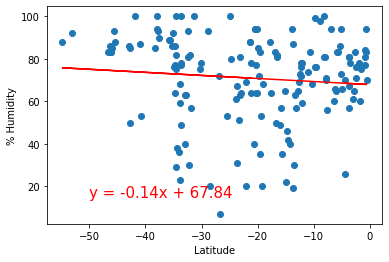

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

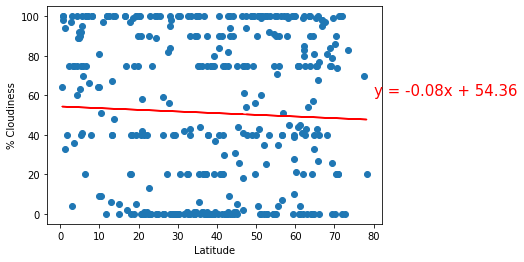

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(80,60))

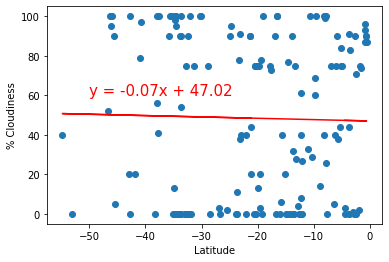

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

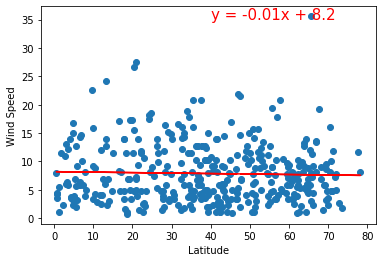

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

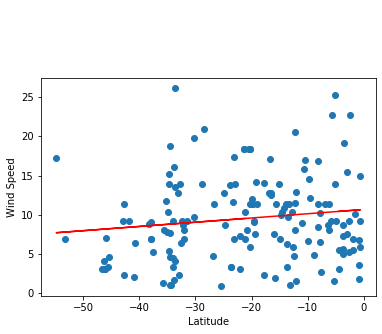

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))